In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sk_metrics

# Load test and results

In [85]:
df_test_labeled = pd.read_csv("./data/M2.csv")
df_test_labeled

,Unnamed: 0,1.1|Introduction,2.3.1|Problem-Solving Agents,2.3.2|Example Problems,2.3.3|Search Algorithms,2.3.4|Uninformed Search Strategies,2.3.5|Informed (Heuristic) Search Strategies,2.3.6|Heuristic Functions,2.3|Solving Problems by Searching,2.4.1|Local Search and Optimization Problems,...,6.25.7|Using Computer Vision,6.25|Computer Vision,6.26.1|Robots,6.26.2|Robot Hardware,6.26.4|Robotic Perception,6.26.5|Planning and Control,6.26.7|Reinforcement Learning in Robotics,6.26.9|Alternative Robotic Frameworks,6.26|Robotics,"6.|Communicating, perceiving, and acting"
0,1.|(gap) in sentence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.|A* search,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.|ABC computer,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.|absolute independence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.|absorbing state,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,2798.|Z-3 (early computer),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3839,2799.|zero-sum game,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3840,2800.|Zeuthen strategy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3841,2801.|Zipf's Law,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [203]:
df_results_labeled = pd.read_csv("./data/results/prediction.csv")
# df_results_labeled = pd.read_csv("./data/RESULTS_post_WZK4KM.csv")

df_results_labeled

,Unnamed: 0,1.1|Introduction,2.3.1|Problem-Solving Agents,2.3.2|Example Problems,2.3.3|Search Algorithms,2.3.4|Uninformed Search Strategies,2.3.5|Informed (Heuristic) Search Strategies,2.3.6|Heuristic Functions,2.3|Solving Problems by Searching,2.4.1|Local Search and Optimization Problems,...,6.25.7|Using Computer Vision,6.25|Computer Vision,6.26.1|Robots,6.26.2|Robot Hardware,6.26.4|Robotic Perception,6.26.5|Planning and Control,6.26.7|Reinforcement Learning in Robotics,6.26.9|Alternative Robotic Frameworks,6.26|Robotics,"6.|Communicating, perceiving, and acting"
0,1.|(gap) in sentence,0.235956,2.197137e-11,1.180994e-09,6.383852e-07,1.494801e-07,4.045492e-09,1.732858e-08,3.852915e-07,2.352565e-06,...,6.811537e-10,2.044064e-07,7.785484e-12,0.000004,2.820912e-10,1.983056e-11,6.257931e-10,9.946791e-09,0.000005,1.000000
1,2.|A* search,0.618425,6.170315e-04,1.539667e-03,1.407380e-01,2.512153e-02,3.435109e-03,1.734786e-03,7.103100e-02,2.000890e-03,...,7.939353e-04,6.184254e-03,3.349478e-05,0.006130,3.904607e-04,4.171043e-05,4.838660e-05,5.743327e-04,0.008812,0.570557
2,3.|ABC computer,0.412708,7.512033e-04,1.929429e-02,5.441663e-02,3.369078e-02,1.329946e-02,9.296271e-04,3.585180e-02,6.792390e-03,...,2.862594e-03,1.345289e-01,1.148965e-03,0.150699,3.832555e-03,6.890367e-04,1.361910e-03,2.758421e-03,0.076821,0.743083
3,4.|absolute independence,0.220610,8.102512e-02,1.589281e-01,5.589436e-01,1.166461e-01,1.433836e-01,1.066025e-01,4.814673e-01,7.088476e-02,...,4.864020e-02,2.361191e-01,6.843026e-03,0.143629,1.368706e-02,1.407471e-02,1.353253e-02,8.628617e-02,0.085610,0.619484
4,5.|absorbing state,0.243486,2.676861e-04,2.764080e-05,2.053613e-03,6.429195e-04,1.212047e-03,2.305442e-03,1.345002e-02,8.238338e-03,...,2.543431e-03,3.683769e-02,1.466620e-06,0.000097,8.112268e-06,2.092548e-05,4.698221e-06,6.204282e-04,0.013335,0.440993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,2798.|Z-3 (early computer),1.000000,1.093751e-04,3.177917e-05,8.021975e-03,1.894983e-03,2.602462e-04,9.261527e-04,8.768377e-03,1.007602e-01,...,6.137257e-04,5.298979e-03,3.208949e-06,0.001637,8.086186e-05,5.118905e-06,4.380984e-05,4.331123e-05,0.005206,0.558853
3839,2799.|zero-sum game,0.237199,1.127137e-05,7.544088e-06,2.668699e-03,6.029687e-04,6.922823e-06,1.433426e-05,3.729755e-03,8.177361e-05,...,3.044812e-06,4.911209e-04,1.066639e-07,0.000311,5.643557e-06,2.753211e-07,7.915684e-07,1.684619e-05,0.000333,0.743891
3840,2800.|Zeuthen strategy,0.126507,9.522240e-05,5.736434e-05,1.331414e-03,1.067305e-02,2.445301e-03,4.230926e-05,2.980029e-03,8.064198e-04,...,8.504275e-04,8.819026e-02,6.040937e-05,0.085088,1.242904e-03,4.162041e-04,1.330551e-04,7.925545e-03,0.175860,0.857415
3841,2801.|Zipf's Law,0.009402,6.674962e-05,3.921227e-04,1.362349e-03,1.287526e-03,1.048038e-03,6.014993e-04,3.851404e-03,9.744490e-04,...,4.682720e-04,7.278403e-03,5.463333e-06,0.141789,9.267274e-04,6.687659e-05,1.513274e-05,4.020176e-03,0.062024,1.000000


# Remove labels from test and results

In [184]:
df_test = df_test_labeled.iloc[:,1:]
M_test = df_test.to_numpy()
df_test

,1.1|Introduction,2.3.1|Problem-Solving Agents,2.3.2|Example Problems,2.3.3|Search Algorithms,2.3.4|Uninformed Search Strategies,2.3.5|Informed (Heuristic) Search Strategies,2.3.6|Heuristic Functions,2.3|Solving Problems by Searching,2.4.1|Local Search and Optimization Problems,2.4.2|Local Search in Continuous Spaces,...,6.25.7|Using Computer Vision,6.25|Computer Vision,6.26.1|Robots,6.26.2|Robot Hardware,6.26.4|Robotic Perception,6.26.5|Planning and Control,6.26.7|Reinforcement Learning in Robotics,6.26.9|Alternative Robotic Frameworks,6.26|Robotics,"6.|Communicating, perceiving, and acting"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [185]:
df_results = df_results_labeled.iloc[:,1:]
M_results = df_results.to_numpy()
df_results

,1.1|Introduction,2.3.1|Problem-Solving Agents,2.3.2|Example Problems,2.3.3|Search Algorithms,2.3.4|Uninformed Search Strategies,2.3.5|Informed (Heuristic) Search Strategies,2.3.6|Heuristic Functions,2.3|Solving Problems by Searching,2.4.1|Local Search and Optimization Problems,2.4.2|Local Search in Continuous Spaces,...,6.25.7|Using Computer Vision,6.25|Computer Vision,6.26.1|Robots,6.26.2|Robot Hardware,6.26.4|Robotic Perception,6.26.5|Planning and Control,6.26.7|Reinforcement Learning in Robotics,6.26.9|Alternative Robotic Frameworks,6.26|Robotics,"6.|Communicating, perceiving, and acting"
0,0.235956,2.197137e-11,1.180994e-09,6.383852e-07,1.494801e-07,4.045492e-09,1.732858e-08,3.852915e-07,2.352565e-06,3.134353e-09,...,6.811537e-10,2.044064e-07,7.785484e-12,0.000004,2.820912e-10,1.983056e-11,6.257931e-10,9.946791e-09,0.000005,1.000000
1,0.618425,6.170315e-04,1.539667e-03,1.407380e-01,2.512153e-02,3.435109e-03,1.734786e-03,7.103100e-02,2.000890e-03,3.422709e-04,...,7.939353e-04,6.184254e-03,3.349478e-05,0.006130,3.904607e-04,4.171043e-05,4.838660e-05,5.743327e-04,0.008812,0.570557
2,0.412708,7.512033e-04,1.929429e-02,5.441663e-02,3.369078e-02,1.329946e-02,9.296271e-04,3.585180e-02,6.792390e-03,3.241023e-03,...,2.862594e-03,1.345289e-01,1.148965e-03,0.150699,3.832555e-03,6.890367e-04,1.361910e-03,2.758421e-03,0.076821,0.743083
3,0.220610,8.102512e-02,1.589281e-01,5.589436e-01,1.166461e-01,1.433836e-01,1.066025e-01,4.814673e-01,7.088476e-02,2.025934e-02,...,4.864020e-02,2.361191e-01,6.843026e-03,0.143629,1.368706e-02,1.407471e-02,1.353253e-02,8.628617e-02,0.085610,0.619484
4,0.243486,2.676861e-04,2.764080e-05,2.053613e-03,6.429195e-04,1.212047e-03,2.305442e-03,1.345002e-02,8.238338e-03,9.239818e-04,...,2.543431e-03,3.683769e-02,1.466620e-06,0.000097,8.112268e-06,2.092548e-05,4.698221e-06,6.204282e-04,0.013335,0.440993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,1.000000,1.093751e-04,3.177917e-05,8.021975e-03,1.894983e-03,2.602462e-04,9.261527e-04,8.768377e-03,1.007602e-01,1.362407e-04,...,6.137257e-04,5.298979e-03,3.208949e-06,0.001637,8.086186e-05,5.118905e-06,4.380984e-05,4.331123e-05,0.005206,0.558853
3839,0.237199,1.127137e-05,7.544088e-06,2.668699e-03,6.029687e-04,6.922823e-06,1.433426e-05,3.729755e-03,8.177361e-05,8.934804e-06,...,3.044812e-06,4.911209e-04,1.066639e-07,0.000311,5.643557e-06,2.753211e-07,7.915684e-07,1.684619e-05,0.000333,0.743891
3840,0.126507,9.522240e-05,5.736434e-05,1.331414e-03,1.067305e-02,2.445301e-03,4.230926e-05,2.980029e-03,8.064198e-04,2.203587e-04,...,8.504275e-04,8.819026e-02,6.040937e-05,0.085088,1.242904e-03,4.162041e-04,1.330551e-04,7.925545e-03,0.175860,0.857415
3841,0.009402,6.674962e-05,3.921227e-04,1.362349e-03,1.287526e-03,1.048038e-03,6.014993e-04,3.851404e-03,9.744490e-04,4.248332e-05,...,4.682720e-04,7.278403e-03,5.463333e-06,0.141789,9.267274e-04,6.687659e-05,1.513274e-05,4.020176e-03,0.062024,1.000000


# Look into the results

In [186]:
v_results = M_results.flatten()
v_results

array([2.35956222e-01, 2.19713726e-11, 1.18099375e-09, ...,
       3.06522480e-07, 1.30635075e-04, 1.00000000e+00])

In [187]:
np.unique(v_results)

array([7.16508532e-21, 7.86963721e-21, 3.53305351e-20, ...,
       9.69039798e-01, 9.84696746e-01, 1.00000000e+00])

# Calculate metrics

In [188]:
df_test.shape

(3843, 156)

In [189]:
M_ones = np.ones(df_test.shape)

In [190]:
threshold_range = np.linspace(1, 0, num=100, endpoint=True)
threshold_range

array([1.        , 0.98989899, 0.97979798, 0.96969697, 0.95959596,
       0.94949495, 0.93939394, 0.92929293, 0.91919192, 0.90909091,
       0.8989899 , 0.88888889, 0.87878788, 0.86868687, 0.85858586,
       0.84848485, 0.83838384, 0.82828283, 0.81818182, 0.80808081,
       0.7979798 , 0.78787879, 0.77777778, 0.76767677, 0.75757576,
       0.74747475, 0.73737374, 0.72727273, 0.71717172, 0.70707071,
       0.6969697 , 0.68686869, 0.67676768, 0.66666667, 0.65656566,
       0.64646465, 0.63636364, 0.62626263, 0.61616162, 0.60606061,
       0.5959596 , 0.58585859, 0.57575758, 0.56565657, 0.55555556,
       0.54545455, 0.53535354, 0.52525253, 0.51515152, 0.50505051,
       0.49494949, 0.48484848, 0.47474747, 0.46464646, 0.45454545,
       0.44444444, 0.43434343, 0.42424242, 0.41414141, 0.4040404 ,
       0.39393939, 0.38383838, 0.37373737, 0.36363636, 0.35353535,
       0.34343434, 0.33333333, 0.32323232, 0.31313131, 0.3030303 ,
       0.29292929, 0.28282828, 0.27272727, 0.26262626, 0.25252

In [191]:
N = np.prod(M_test.shape)
N_vp = np.sum(np.sum(M_test))
N_vn = N - np.sum(np.sum(M_test))
print(N, N_vp, N_vn)

599508 5180.0 594328.0


In [192]:

metrics = []

for t in threshold_range:
    metric_record = {}
    M_threshold = t * M_ones
    
    M_positives = M_results >= M_threshold
    M_negatives = M_results < M_threshold
    
    N_p = np.sum(M_positives)
    M_tp = np.multiply(M_positives, M_test)
    N_tp = np.sum(M_tp)
    N_fp = N_p - N_tp
    
    
    N_n = np.sum(M_negatives)
    M_tn = np.multiply(M_negatives, -1 * (M_test - 1))
    N_tn = np.sum(M_tn)
    N_fn = N_n - N_tn
    
    metric_record = {
        "theshold": t,
        "N_p": N_p,
        "N_n": N_n,
        "N_tp": N_tp,
        "N_fp": N_fp,
        "N_tn": N_tn,
        "N_fn": N_fn,
        "sensitivity": N_tp / (N_tp + N_fn),
        "specificity": N_tn / (N_tn + N_fp),
        "precision":   N_tp / (N_tp + N_fp),
        "accuraccy":   (N_tp + N_tn) / (N_tp + N_tn + N_fp + N_fn)
    }
    metrics.append(metric_record)
    
df_metrics = pd.DataFrame(metrics)
df_metrics

,theshold,N_p,N_n,N_tp,N_fp,N_tn,N_fn,sensitivity,specificity,precision,accuraccy
0,1.000000,3923,595585,3923.0,0.0,594328.0,1257.0,0.757336,1.000000,1.000000,0.997903
1,0.989899,3923,595585,3923.0,0.0,594328.0,1257.0,0.757336,1.000000,1.000000,0.997903
2,0.979798,3924,595584,3924.0,0.0,594328.0,1256.0,0.757529,1.000000,1.000000,0.997905
3,0.969697,3924,595584,3924.0,0.0,594328.0,1256.0,0.757529,1.000000,1.000000,0.997905
4,0.959596,3942,595566,3929.0,13.0,594315.0,1251.0,0.758494,0.999978,0.996702,0.997892
...,...,...,...,...,...,...,...,...,...,...,...
95,0.040404,118753,480755,5076.0,113677.0,480651.0,104.0,0.979923,0.808730,0.042744,0.810209
96,0.030303,129056,470452,5084.0,123972.0,470356.0,96.0,0.981467,0.791408,0.039394,0.793050
97,0.020202,144312,455196,5091.0,139221.0,455107.0,89.0,0.982819,0.765751,0.035278,0.767626
98,0.010101,171127,428381,5109.0,166018.0,428310.0,71.0,0.986293,0.720663,0.029855,0.722958


(0, 1)

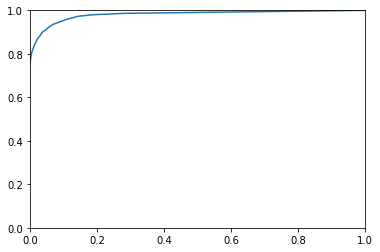

In [193]:
plt.plot(1 - df_metrics["specificity"], df_metrics["sensitivity"])
plt.xlim([0,1])
plt.ylim([0,1])

In [194]:
sk_metrics.auc(df_metrics["specificity"], df_metrics["sensitivity"])

0.9810204907652361

In [195]:
np.trapz(df_metrics["sensitivity"], 1 - df_metrics["specificity"])

0.9810204907652361

In [196]:
# 

In [233]:
def evaluate(M_test, M_results, name):
    metrics = []
    for t in threshold_range:
        metric_record = {}
        M_threshold = t * M_ones

        M_positives = M_results >= M_threshold
        M_negatives = M_results < M_threshold

        N_p = np.sum(M_positives)
        M_tp = np.multiply(M_positives, M_test)
        N_tp = np.sum(M_tp)
        N_fp = N_p - N_tp


        N_n = np.sum(M_negatives)
        M_tn = np.multiply(M_negatives, -1 * (M_test - 1))
        N_tn = np.sum(M_tn)
        N_fn = N_n - N_tn

        metric_record = {
            "theshold": t,
            "N_p": N_p,
            "N_n": N_n,
            "N_tp": N_tp,
            "N_fp": N_fp,
            "N_tn": N_tn,
            "N_fn": N_fn,
            "sensitivity": N_tp / (N_tp + N_fn),
            "specificity": N_tn / (N_tn + N_fp),
            "precision":   N_tp / (N_tp + N_fp),
            "accuraccy":   (N_tp + N_tn) / (N_tp + N_tn + N_fp + N_fn)
        }
        metrics.append(metric_record)

    df_metrics = pd.DataFrame(metrics)
    df_metrics
    
    auc = sk_metrics.auc(df_metrics["specificity"], df_metrics["sensitivity"])
    plt.figure()
    plt.plot(1 - df_metrics["specificity"], df_metrics["sensitivity"])
    plt.title(f"{ name }: { auc }")
    plt.xlim([0,1])
    plt.ylim([0,1])
    
    
    print(name, auc)

In [234]:
import glob
import os

data/results/RESULTS_post_WZK4KM.csv 0.8786679536679537
data/results/prediction.csv 0.9810204907652361


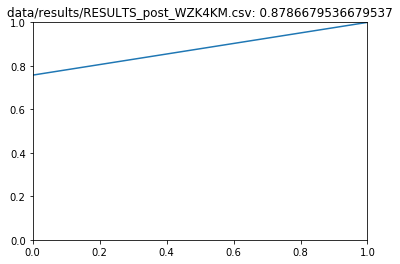

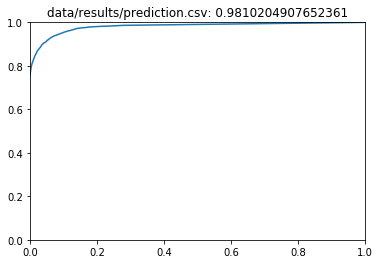

In [235]:
for result_path in glob.glob("data/results/*.csv"):
    df_r = pd.read_csv(result_path)
    M_r  = df_r.iloc[:,1:].to_numpy() 
    evaluate(M_test, M_r, result_path)